In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
berlin = pd.read_csv('/Users/jyots/Desktop/DSI-SF-4-Jyojha/Capstone_Project/airbnb_DataSets/Airbnb listings in Berlin (November 2015).csv',
                   encoding='utf8')

In [4]:
berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14922 entries, 0 to 14921
Data columns (total 16 columns):
Unnamed: 0              14922 non-null int64
room_id                 14922 non-null int64
host_id                 14912 non-null float64
room_type               14913 non-null object
borough                 0 non-null float64
neighborhood            14922 non-null object
reviews                 14922 non-null int64
overall_satisfaction    11846 non-null float64
accommodates            13701 non-null float64
bedrooms                14872 non-null float64
bathrooms               13804 non-null float64
price                   14922 non-null float64
minstay                 14487 non-null float64
latitude                14922 non-null float64
longitude               14922 non-null float64
collected               14922 non-null object
dtypes: float64(10), int64(3), object(3)
memory usage: 1.8+ MB


In [5]:
berlin.drop('borough', axis=1, inplace=True)

In [6]:
berlin.neighborhood.unique()

array([u'Mitte', u'Pankow', u'Tempelhof-Sch\ufffdneberg',
       u'Friedrichshain-Kreuzberg', u'Charlottenburg-Wilmersdorf',
       u'Neuk\ufffdlln', u'Lichtenberg', u'Reinickendorf',
       u'Steglitz-Zehlendorf', u'Treptow-K\ufffdpenick',
       u'Marzahn-Hellersdorf', u'Spandau'], dtype=object)

In [7]:
berlin.neighborhood.replace(u'Tempelhof-Sch\ufffdneberg',u'Tempelhof-Schoeneberg',inplace=True)
berlin.neighborhood.replace(u'Neuk\ufffdlln',u'Neukolln',inplace=True)
berlin.neighborhood.replace(u'Treptow-K\ufffdpenick',u'Treptow-Koepenick',inplace=True)

In [8]:
berlin.head(2)

,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,1944,2164.0,Private room,Mitte,17,4.0,2.0,1.0,1.0,26.0,1.0,52.544251,13.397491,2015-11-30 23:41:50.083211
1,1,1971,2177.0,Entire home/apt,Mitte,19,5.0,3.0,1.0,1.0,158.0,4.0,52.517352,13.406643,2015-12-01 06:49:15.618766


In [9]:
berlin = berlin[berlin['room_type'].notnull()]

In [10]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(berlin.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))


In [11]:
df1 = df1.reset_index(level = 0)
df1.sort('host_id', ascending=False, inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [12]:
df1.sort_values('neighborhood',inplace=True)

In [13]:
df1 = df1.reset_index()

In [14]:
def standardize(S):
    scaler = preprocessing.StandardScaler().fit(S)
    return scaler.transform(S)

In [15]:
df1.host_id = standardize(df1.host_id)
df1.reviews = standardize(df1.reviews)
df1.price = standardize(df1.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWar

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


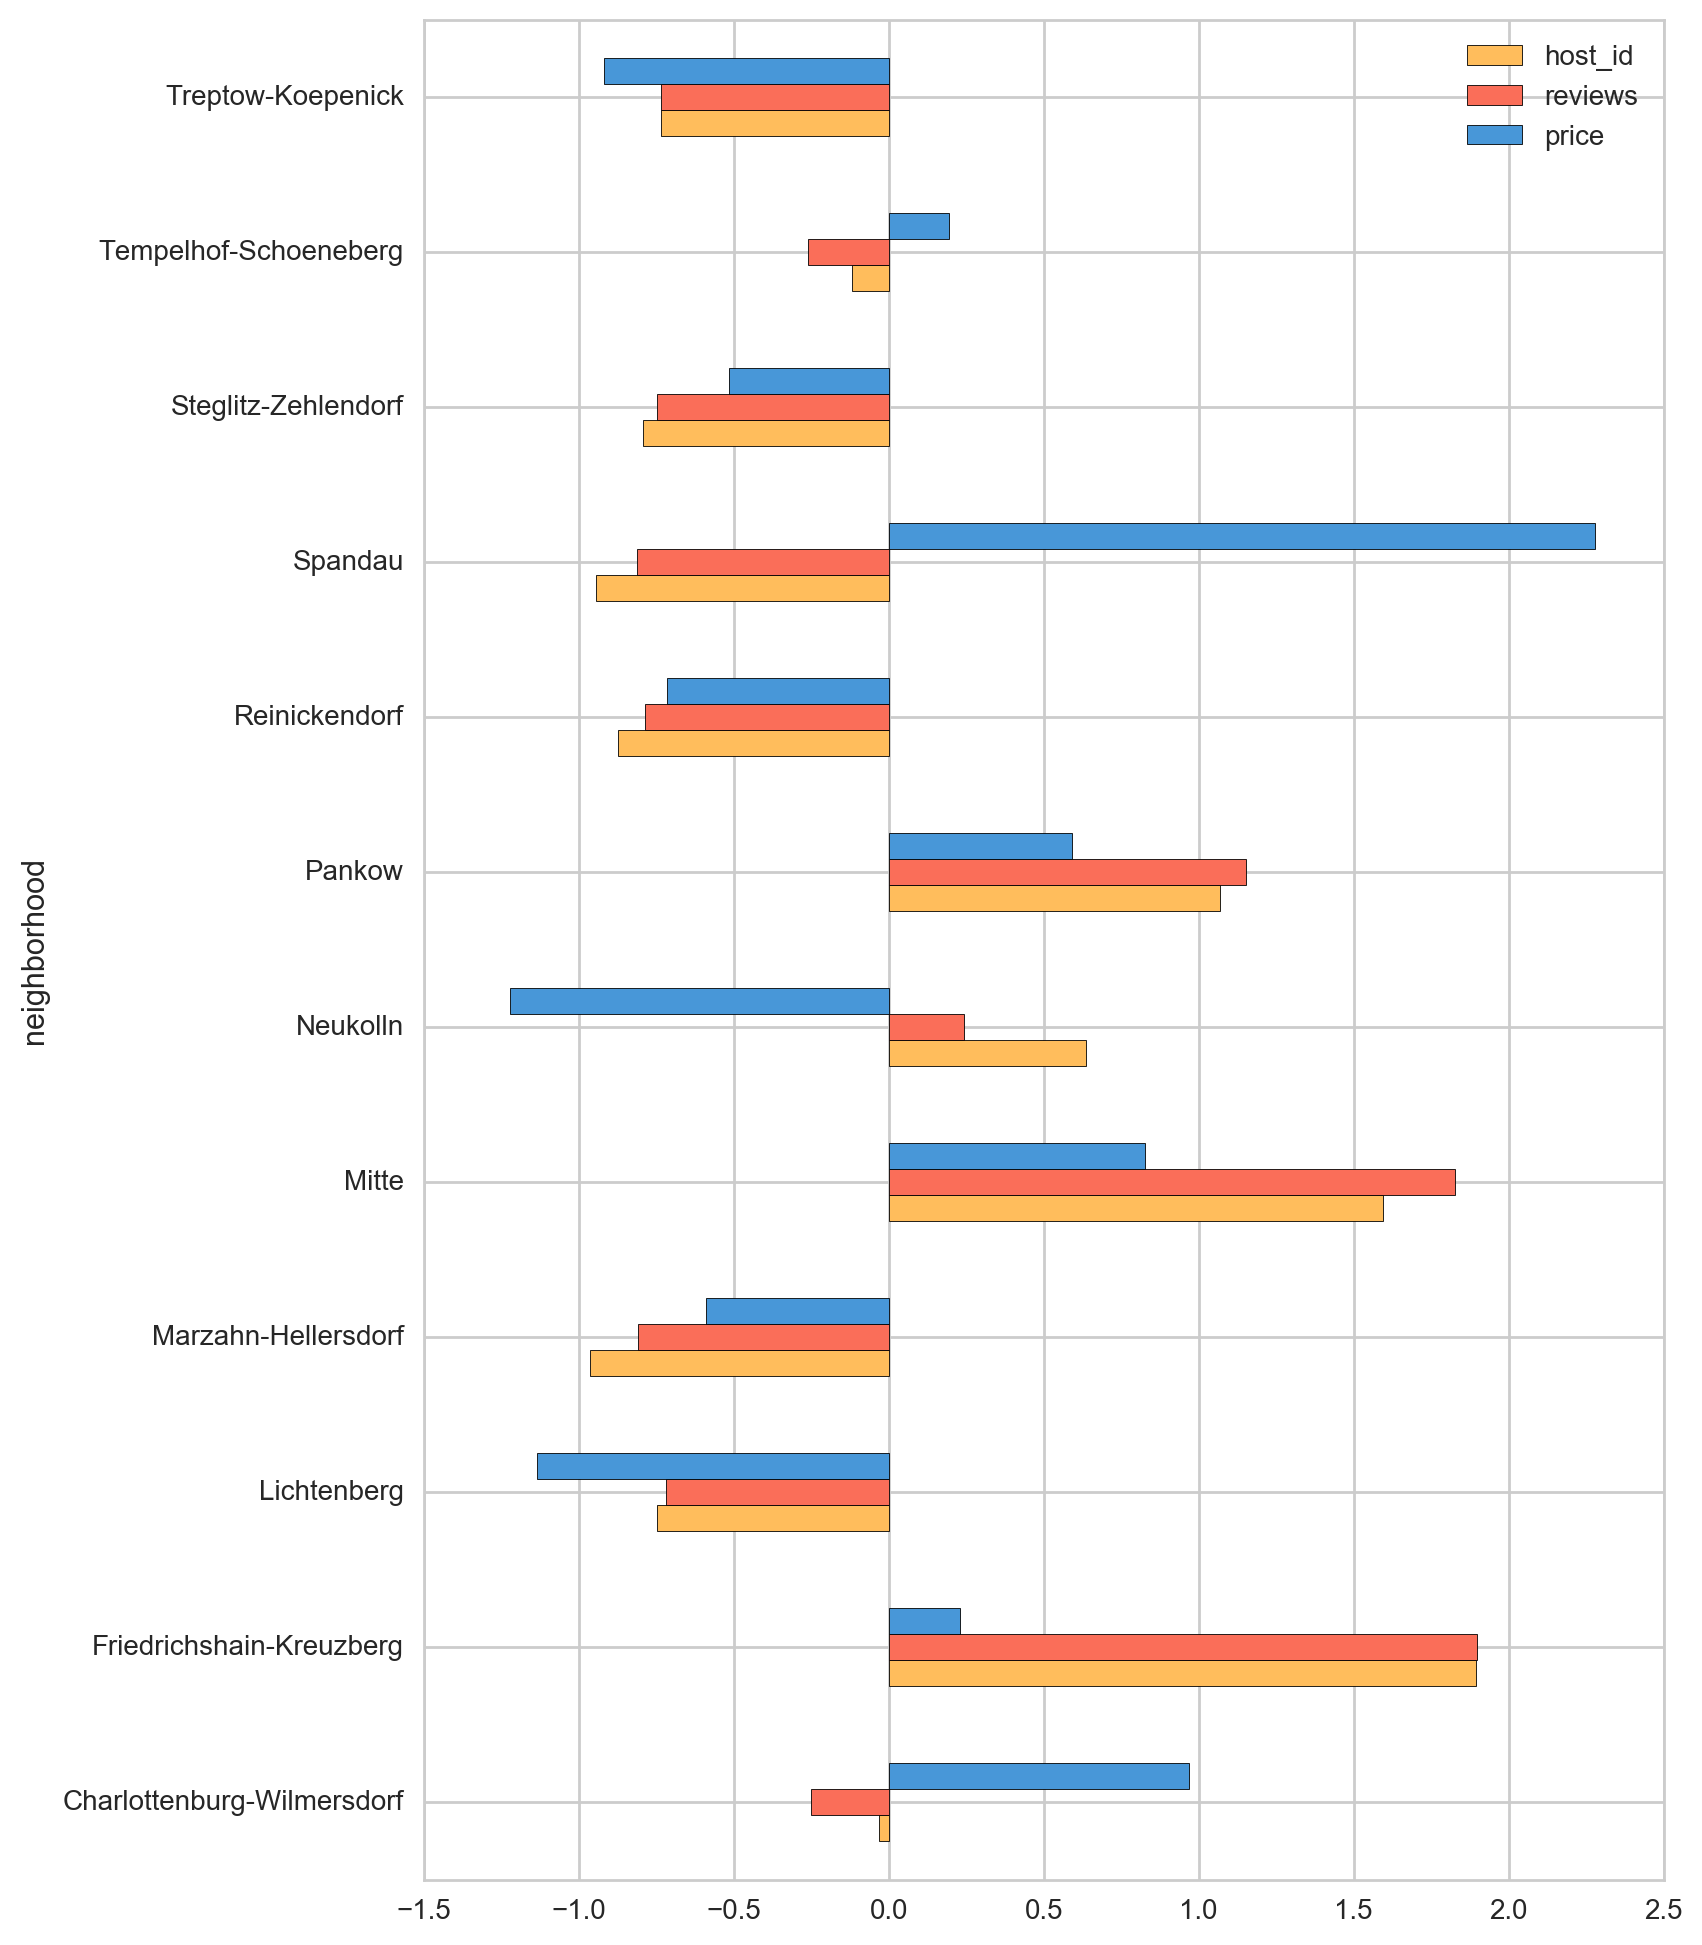

In [16]:
df1.plot(x = 'neighborhood', y = ['host_id','reviews','price'], kind ='barh', figsize =(8, 12),
        colors = ['#FFBD5C','#FA6E59','#4897D8'])

In [17]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(berlin.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [18]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [19]:
df2.host_id = standardize(df2.host_id)
df2.reviews = standardize(df2.reviews)
df2.price = standardize(df2.price)
df2.head()

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,Charlottenburg-Wilmersdorf,0.189962,0.630126,1.613026
1,Private room,Charlottenburg-Wilmersdorf,-0.179018,-0.082931,-0.368676
2,Shared room,Charlottenburg-Wilmersdorf,-0.539561,-0.664421,-0.972633
3,Entire home/apt,Friedrichshain-Kreuzberg,3.218671,2.939845,1.376671
4,Private room,Friedrichshain-Kreuzberg,0.887424,1.427645,-0.557482


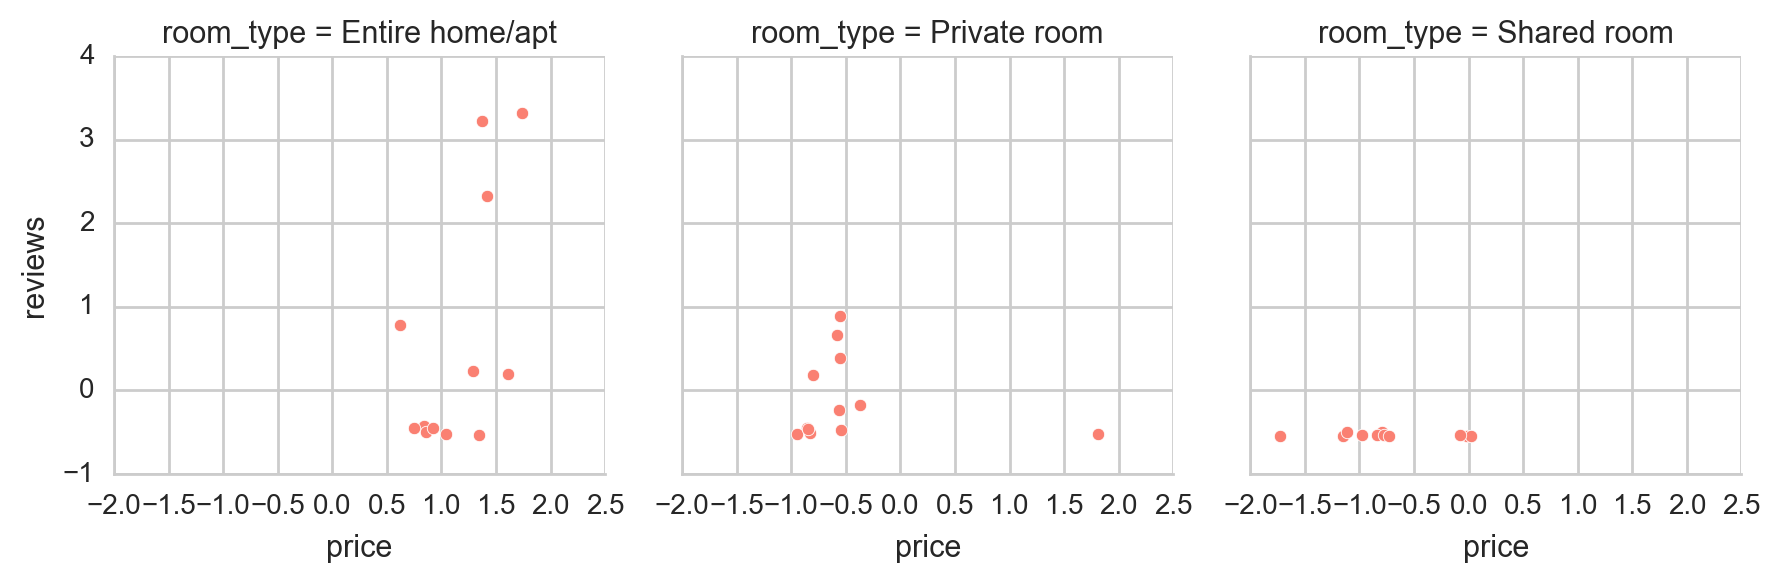

In [20]:
g = sns.FacetGrid(df2, col="room_type")
g = g.map(plt.scatter,"price","reviews", edgecolor="w", color = "salmon")

In [21]:
custom = lambda x: np.average(x)
neighborhood_data = pd.DataFrame(berlin.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom, 'latitude':custom,'longitude':custom}))

In [22]:
neighborhood_data.reset_index(inplace =True)

In [23]:
neighborhood_data

,neighborhood,reviews,host_id,price,longitude,latitude
0,Charlottenburg-Wilmersdorf,11850,1206,74.570481,13.308405,52.502671
1,Friedrichshain-Kreuzberg,55932,3596,67.674638,13.432686,52.503632
2,Lichtenberg,2273,317,54.977918,13.492388,52.511994
3,Marzahn-Hellersdorf,384,48,60.062500,13.580916,52.519282
4,Mitte,54474,3222,73.237120,13.379161,52.531900
5,Neukolln,21965,2034,54.165111,13.434534,52.478687
6,Pankow,40694,2572,71.050544,13.420981,52.544561
7,Reinickendorf,867,158,58.886076,13.325338,52.581998
8,Spandau,328,71,86.788732,13.203541,52.523982
9,Steglitz-Zehlendorf,1700,258,60.736434,13.294671,52.443872


In [24]:
# define price

def price_color(neighborhood_data, row):
    
    price_max = np.max(neighborhood_data.price)
    price_min = np.min(neighborhood_data.price)
    
    
    if price_min <= neighborhood_data.ix[row, 'price'] < price_min + ((price_max - price_min)/3):
        return 'green'
    elif price_min + ((price_max - price_min)/3) <= neighborhood_data.ix[row, 'price'] < (price_min + 2*(price_max - price_min)/3):
        return 'orange'
    else:
        return 'red'

In [25]:
import folium


In [26]:
berlin_map = folium.Map(location=[52.520008, 13.404954])

for each_row in range(neighborhood_data.shape[0]):
     berlin_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [27]:
berlin_map

In [28]:
import json


In [29]:
with open('/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/berliner-bezirke.geojson') as fp:

     geodata = json.load(fp)

In [30]:
geodata.keys()

[u'type', u'features']

In [31]:
#geodata['features'][0]['geometry']['coordinates']

In [32]:
neighborhood_coords = {}

for i in range(len(geodata['features'])):
    neighborhood_coords[geodata['features'][i]['properties']['Name']] = geodata['features'][i]['geometry']['coordinates']

In [33]:
neighborhood_coords = pd.DataFrame(neighborhood_coords.items(), columns = ['neighborhood', 'long_lat'])

In [34]:
neighborhood_coords.sort_values('neighborhood',inplace=True)

In [35]:
neighborhood_coords = neighborhood_coords.reset_index()
neighborhood_coords.drop('index', axis=1)

,neighborhood,long_lat
0,Charlottenburg-Wilmersdorf,"[[[13.3127880379, 52.5323108846, 0.0], [13.312..."
1,Friedrichshain-Kreuzberg,"[[[13.4294023936, 52.5085721176, 0.0], [13.429..."
2,Lichtenberg,"[[[13.5018896139, 52.4825756351, 0.0], [13.501..."
3,Marzahn-Hellersdorf,"[[[13.5185993644, 52.5145352705, 0.0], [13.518..."
4,Mitte,"[[[13.403528471, 52.54021229, 0.0], [13.404195..."
5,Neukölln,"[[[13.4112583397, 52.4391237838, 0.0], [13.412..."
6,Pankow,"[[[13.3892818618, 52.568242417, 0.0], [13.3877..."
7,Reinickendorf,"[[[13.3475571931, 52.590083184, 0.0], [13.3478..."
8,Spandau,"[[[13.1502809015, 52.5677149012, 0.0], [13.150..."
9,Steglitz-Zehlendorf,"[[[13.3454705501, 52.4152543147, 0.0], [13.345..."


In [36]:
neighborhood_coords.neighborhood

0     Charlottenburg-Wilmersdorf
1       Friedrichshain-Kreuzberg
2                    Lichtenberg
3            Marzahn-Hellersdorf
4                          Mitte
5                       Neukölln
6                         Pankow
7                  Reinickendorf
8                        Spandau
9            Steglitz-Zehlendorf
10          Tempelhof-Schöneberg
11              Treptow-Köpenick
Name: neighborhood, dtype: object

In [37]:
neighborhood_coords.neighborhood.replace(u'Tempelhof-Schöneberg',u'Tempelhof-Schoeneberg',inplace=True)
neighborhood_coords.neighborhood.replace(u'Neukölln',u'Neukolln',inplace=True)
neighborhood_coords.neighborhood.replace(u'Treptow-Köpenick',u'Treptow-Koepenick',inplace=True)

In [38]:
neighborhood_coords.neighborhood

0     Charlottenburg-Wilmersdorf
1       Friedrichshain-Kreuzberg
2                    Lichtenberg
3            Marzahn-Hellersdorf
4                          Mitte
5                       Neukolln
6                         Pankow
7                  Reinickendorf
8                        Spandau
9            Steglitz-Zehlendorf
10         Tempelhof-Schoeneberg
11             Treptow-Koepenick
Name: neighborhood, dtype: object

In [39]:
neighborhood_coords['longitude'] = 0
neighborhood_coords['latitude'] = 0

In [40]:
import shapely
from shapely.geometry import Polygon, Point

#center = {}

for i in range(neighborhood_coords.shape[0]):
    poly = Polygon(neighborhood_coords.long_lat[i][0])
    neighborhood_coords.longitude[i] = poly.centroid.wkt.split()[1].split('(')[1]
    neighborhood_coords.latitude[i] = poly.centroid.wkt.split()[2].split(')')[0]



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
neighborhood_coords.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
index           12 non-null int64
neighborhood    12 non-null object
long_lat        12 non-null object
longitude       12 non-null object
latitude        12 non-null object
dtypes: int64(1), object(4)
memory usage: 552.0+ bytes


In [42]:
neighborhood_coords['longitude'] = neighborhood_coords['longitude'].map(lambda x : float(x))
neighborhood_coords['latitude'] = neighborhood_coords['latitude'].map(lambda x : float(x))

In [43]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/berliner-bezirke.geojson'


nbrhd_map = folium.Map(location=[52.520008, 13.404954],
                    zoom_start=12)
nbrhd_map.choropleth(geo_path=path, fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

In [44]:
for each_row in range(neighborhood_coords.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_coords.ix[each_row,'latitude'],neighborhood_coords.ix[each_row,'longitude']],
                            popup = str(neighborhood_coords.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [45]:
nbrhd_map

In [46]:
br_metro = pd.read_table('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/data_metro_full.txt',sep ='\t',
                   )

In [47]:
br_metro = br_metro[br_metro['city'] == 'Berlin']

In [48]:
br_metro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 1100 to 1731
Data columns (total 10 columns):
city            173 non-null object
geo_location    173 non-null object
location        173 non-null object
station         173 non-null object
line            173 non-null object
opened_month    173 non-null float64
opened_day      173 non-null float64
opened_year     173 non-null int64
lon             173 non-null float64
lat             173 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.9+ KB


In [49]:
br_metro.reset_index(drop = True, inplace=True)

In [50]:
br_metro.head(2)

,city,geo_location,location,station,line,opened_month,opened_day,opened_year,lon,lat
0,Berlin,"Adenauerplatz, Berlin, Germany","Berlin, Germany",Adenauerplatz,U7,4.0,28.0,1978,13.307031,52.499987
1,Berlin,"Afrikanische Straße, Berlin, Germany","Berlin, Germany",Afrikanische Straße,U6,5.0,3.0,1956,13.336403,52.553354


In [51]:
br_metro.rename(columns ={'lon':'longitude','lat':'latitude'},inplace=True)

In [52]:
for each_row in range(br_metro.shape[0]):
     nbrhd_map.circle_marker(location = [br_metro.ix[each_row,'latitude'],br_metro.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'blue',line_color = 'blue',fill_opacity = 0.8
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [53]:
nbrhd_map

In [54]:
import shapely
from shapely.geometry import Polygon, Point

In [55]:
# finding the number of metro stations in each neighborhood

import shapely
from shapely.geometry import Polygon, Point


def dot_count(polygon_coords, dot_coords):
    count_dict = {}

    for row in range(polygon_coords.shape[0]):
        poly = Polygon(polygon_coords.ix[row,u'long_lat'][0])
        count = 0
        for i in range(dot_coords.shape[0]):
            point = Point(dot_coords.ix[i,'longitude'],dot_coords.ix[i,'latitude'])
            #print point
        
            if poly.contains(point):
                count = count + 1
        #print count
        nbrhd_name = polygon_coords.ix[row,'neighborhood']
        count_dict[nbrhd_name] = count
    
    return count_dict


In [56]:
metrostn_count = dot_count(neighborhood_coords, br_metro)

In [57]:
metrostn_count = pd.DataFrame(metrostn_count.items(),columns=['neighborhood','stn_count'])

In [58]:
metrostn_count.sort_values('neighborhood',inplace=True)

In [59]:
metrostn_count = metrostn_count.reset_index()

In [60]:
metrostn_count

,index,neighborhood,stn_count
0,1,Charlottenburg-Wilmersdorf,30
1,10,Friedrichshain-Kreuzberg,19
2,2,Lichtenberg,5
3,6,Marzahn-Hellersdorf,8
4,4,Mitte,37
5,9,Neukolln,16
6,0,Pankow,5
7,11,Reinickendorf,13
8,8,Spandau,8
9,3,Steglitz-Zehlendorf,10


In [61]:
import xmltodict

In [62]:
with open("/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/Berlin_Restaurant_Map.kml") as fp:

    rd = xmltodict.parse(fp)

In [63]:
#rd

In [64]:
rest_dict = {}

for point in rd['kml']['Document']['Folder']['Placemark']:
    rest_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [65]:
rest_data = pd.DataFrame(rest_dict.items(), columns =['rest_name','coordinates'])
rest_data.head(2)

,rest_name,coordinates
0,Ristorante Il Mondo,"[13.481898499999943, 52.5143862, 0.0]"
1,Pauly Saal,"[13.39436180000007, 52.5264378, 0.0]"


In [66]:
rest_data['longitude'] = rest_data['coordinates'].map(lambda x: float(x[0]))
rest_data['latitude'] = rest_data['coordinates'].map(lambda x: float(x[1]))

In [67]:
rest_data.head(2)

,rest_name,coordinates,longitude,latitude
0,Ristorante Il Mondo,"[13.481898499999943, 52.5143862, 0.0]",13.481898,52.514386
1,Pauly Saal,"[13.39436180000007, 52.5264378, 0.0]",13.394362,52.526438


In [68]:
rest_count = dot_count(neighborhood_coords, rest_data)
#rest_count

In [69]:
rest_count = pd.DataFrame(rest_count.items(), columns=['neighborhood','rest_count'])

In [70]:
rest_count.sort_values('neighborhood', inplace=True)

In [71]:
rest_count = rest_count.reset_index()

In [72]:
rest_count

,index,neighborhood,rest_count
0,1,Charlottenburg-Wilmersdorf,9
1,10,Friedrichshain-Kreuzberg,12
2,2,Lichtenberg,10
3,6,Marzahn-Hellersdorf,10
4,4,Mitte,29
5,9,Neukolln,10
6,0,Pankow,8
7,11,Reinickendorf,10
8,8,Spandau,10
9,3,Steglitz-Zehlendorf,10


In [73]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/berliner-bezirke.geojson'


restaurant_map = folium.Map(location=[52.520008, 13.404954],
                    zoom_start=12)
restaurant_map.choropleth(geo_path=path, fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

In [74]:
for each_row in range(neighborhood_coords.shape[0]):
     restaurant_map.simple_marker(location = [neighborhood_coords.ix[each_row,'latitude'],neighborhood_coords.ix[each_row,'longitude']],
                            popup = str(neighborhood_coords.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [75]:
for each_row in range(rest_data.shape[0]):
     restaurant_map.circle_marker(location = [rest_data.ix[each_row,'latitude'],rest_data.ix[each_row,'longitude']],
                         radius = 50,fill_color = '#ff0080',line_color = '#ff0080')
                            

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [76]:
restaurant_map

In [77]:
# Euclidean distance between center of each neighborhood and the main Intl Airport CDG

bt_loc = (52.55583111, 13.285998856)
dist2 = []

from shapely.geometry import Point
point1 = Point(bt_loc)

for i in range(neighborhood_coords.shape[0]):
    
            point2 = Point(neighborhood_coords.ix[i,'latitude'],neighborhood_coords.ix[i,'longitude'])
            #dist1.append(Euclidean_distance(point1,point2))
            dist2.append(point1.distance(point2))

In [78]:
se = pd.Series(dist2)

In [79]:
neighborhood_coords.head(2)

,index,neighborhood,long_lat,longitude,latitude
0,1,Charlottenburg-Wilmersdorf,"[[[13.3127880379, 52.5323108846, 0.0], [13.312...",13.270230,52.501040
1,10,Friedrichshain-Kreuzberg,"[[[13.4294023936, 52.5085721176, 0.0], [13.429...",13.428332,52.503883


In [80]:
neighborhood_center = neighborhood_coords[['neighborhood','longitude','latitude']]

In [81]:
neighborhood_center['dist_arprt'] = se.values

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [82]:
neighborhood_center

,neighborhood,longitude,latitude,dist_arprt
0,Charlottenburg-Wilmersdorf,13.270230,52.501040,0.057015
1,Friedrichshain-Kreuzberg,13.428332,52.503883,0.151517
2,Lichtenberg,13.509767,52.534913,0.224744
3,Marzahn-Hellersdorf,13.578832,52.521120,0.294883
4,Mitte,13.365964,52.532894,0.083190
5,Neukolln,13.454966,52.441078,0.204250
6,Pankow,13.440265,52.597215,0.159721
7,Reinickendorf,13.291340,52.595680,0.040205
8,Spandau,13.178821,52.525798,0.111306
9,Steglitz-Zehlendorf,13.239080,52.434845,0.129765


In [83]:
neighborhood_center['rest_count'] = rest_count['rest_count']
neighborhood_center['metrostn_count'] = metrostn_count['stn_count']
neighborhood_center['host_count'] = neighborhood_data['host_id']
neighborhood_center['review_count'] = neighborhood_data['reviews']
neighborhood_center['price'] = neighborhood_data['price']

In [84]:
neighborhood_center.head(2)

,neighborhood,longitude,latitude,dist_arprt,rest_count,metrostn_count,host_count,review_count,price
0,Charlottenburg-Wilmersdorf,13.270230,52.501040,0.057015,9,30,1206,11850,74.570481
1,Friedrichshain-Kreuzberg,13.428332,52.503883,0.151517,12,19,3596,55932,67.674638


In [85]:
#neighborhood_center.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Berlin_NFeatures.csv')